# 판다스 시각화

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null

In [ ]:
# 반드시 런타임 다시시작!

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

Pandas의 시리즈나 데이터프레임은 plot이라는 시각화 메서드를 내장하고 있다. plot은 matplotlib를 내부에서 임포트하여 사용한다. plot은 matplotlib를 내장하고 있는 기능.

## 예제

In [5]:
np.random.seed(2021)
df1 = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2021', periods=100),
                   columns=['A', 'B', 'C']).cumsum()    #cumsum은 계속 더해나감
df1.tail()

,A,B,C
2021-04-06,19.553541,11.530579,-8.757243
2021-04-07,20.909591,10.466816,-10.143565
2021-04-08,22.435144,11.674278,-7.474442
2021-04-09,22.546156,10.547727,-7.594791
2021-04-10,21.319639,9.825032,-8.213817


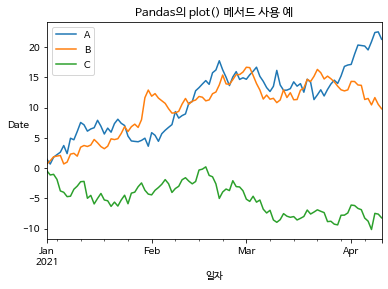

In [10]:
df1.plot()
plt.title('Pandas의 plot() 메서드 사용 예')
plt.xlabel('일자')
plt.ylabel('Date', rotation=0)
plt.show()

## Barchart

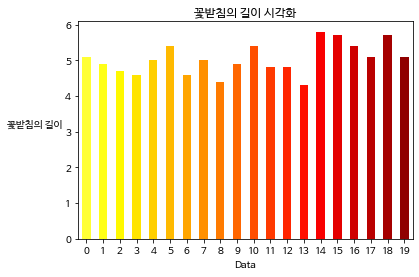

In [19]:
iris.sepal_length[:20].plot(kind='bar', rot=0, 
                            color=plt.get_cmap('hot')(np.linspace(0.8, 0.2, 20)))
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이", rotation=0, labelpad=30)
plt.show()

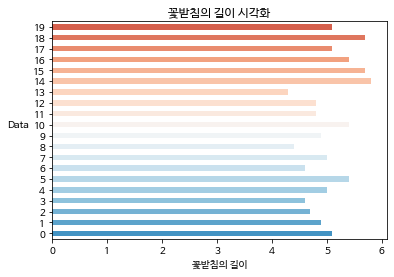

In [26]:
iris.sepal_length[:20].plot(kind='barh', rot=0, 
                            color=plt.get_cmap('RdBu')(np.linspace(0.8, 0.2, 20)))
plt.title("꽃받침의 길이 시각화")
plt.xlabel("꽃받침의 길이")
plt.ylabel("Data", rotation=0, labelpad=15)
plt.show()

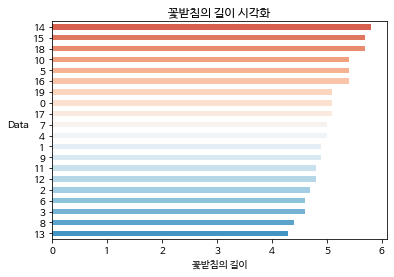

In [28]:
iris.sepal_length[:20].sort_values().plot(kind='barh', rot=0, 
                            color=plt.get_cmap('RdBu')(np.linspace(0.8, 0.2, 20)))
plt.title("꽃받침의 길이 시각화")
plt.xlabel("꽃받침의 길이")
plt.ylabel("Data", rotation=0, labelpad=15)
plt.show()

In [38]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


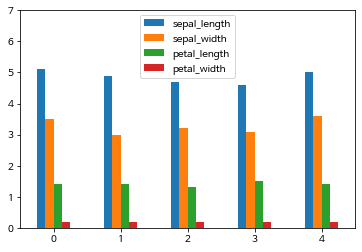

In [32]:
iris[:5].plot.bar(rot=0)
plt.ylim(0,7)
plt.show()

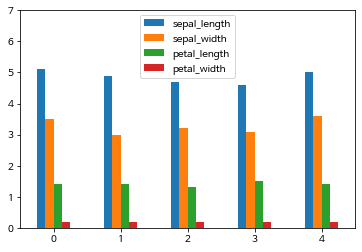

In [34]:
iris[:5].plot(kind='bar', rot=0)
plt.ylim(0,7)
plt.show()

In [35]:
df2 = iris.groupby(iris.species).mean()
df2

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


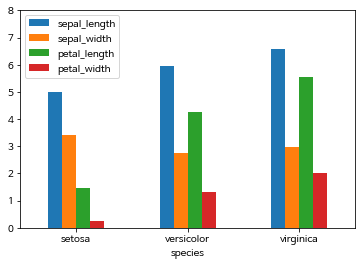

In [37]:
df2.plot.bar(rot=0)
plt.ylim(0,8)
plt.show()

In [39]:
df2 = iris.groupby(iris.species).mean()
df2.columns.name = 'feature'
df2

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


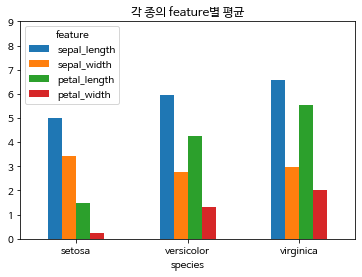

In [44]:
df2.plot.bar(rot=0)
plt.title('각 종의 feature별 평균')
plt.ylim(0,9)
plt.show()

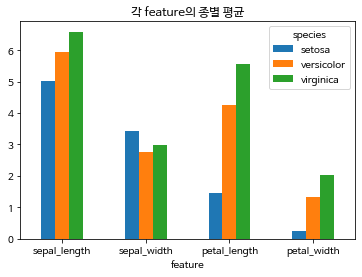

In [48]:
df2.T.plot.bar(rot=0)
plt.title('각 feature의 종별 평균')
plt.show()

## Pie chart

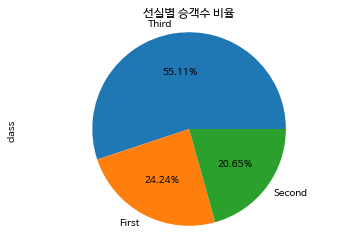

In [50]:
#타이타닉예제
df3 = titanic['class'].value_counts()
df3.plot.pie(autopct='%.2f%%')   # %를 문자로 나타내기 위해 두번씀 안나타나게하려면 뒤에는 하나만
plt.title('선실별 승객수 비율')
plt.axis('equal')
plt.show()

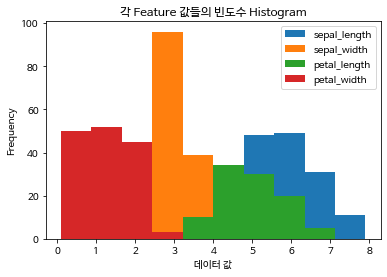

In [51]:
iris.plot.hist()
plt.title("각 Feature 값들의 빈도수 Histogram")
plt.xlabel("데이터 값")
plt.show()

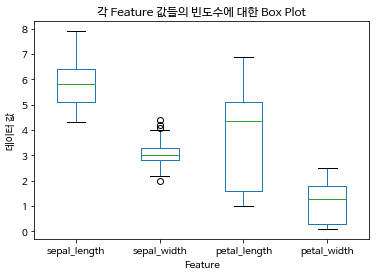

In [52]:
iris.plot.box()
plt.title("각 Feature 값들의 빈도수에 대한 Box Plot")
plt.xlabel("Feature")
plt.ylabel("데이터 값")
plt.show()


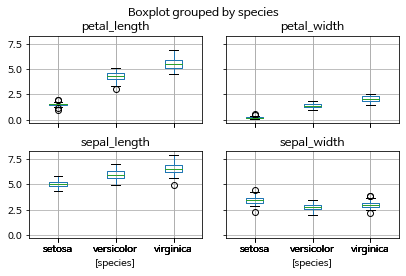

In [54]:
iris.boxplot(by='species')
plt.tight_layout(pad=2, h_pad=1)
plt.show()